## Preblur for fermionic functions

Demo script for preblur for fermionic functions. Note that the example is somewhat extreme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.environ['HOME']+'/Programs/ana_cont')
import ana_cont.continuation as cont

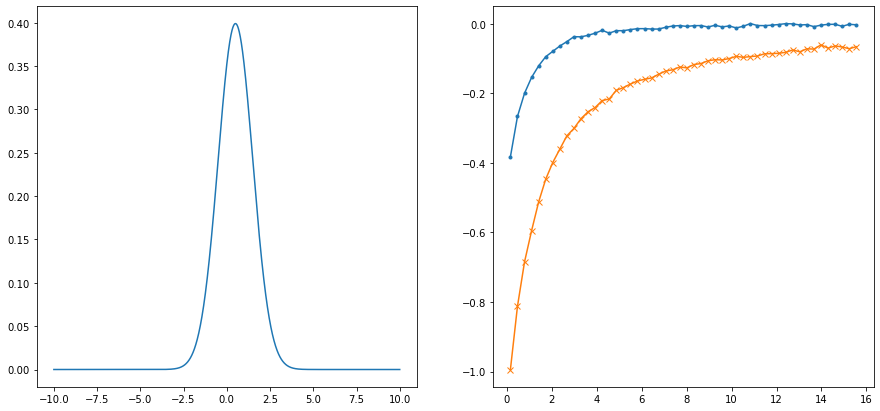

In [2]:
wgrid_full = np.linspace(-10., 10., num=2001, endpoint=True)
spectrum_true = np.exp(-(wgrid_full-0.5)**2/(2.*1.**2))
spectrum_true /= np.trapz(spectrum_true, wgrid_full)
beta = 20.
niw = 50
noise_ampl = 0.005
rng = np.random.RandomState(321)
noise = noise_ampl * (rng.randn((niw)) + 1j * rng.randn((niw))) / np.sqrt(2)
wn = np.pi/beta * (2.*np.arange(niw) + 1.)
giw_pure = np.trapz(spectrum_true[None,:]/(1j*wn[:,None] - wgrid_full[None,:]), wgrid_full, axis=1)
giw = giw_pure + noise
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
ax[0].plot(wgrid_full, spectrum_true)
ax[1].plot(wn, giw.real, marker='.')
ax[1].plot(wn, giw.imag, marker='x')
plt.show()

301 data points on real axis
100 data points on imaginary axis
36 significant singular values
Precomputation of coefficient matrices...
log10(alpha) = 9.00,	chi2 = 8.389e+04,   S = -2.096e-09,   nfev = 5,   norm = 1.000
log10(alpha) = 8.00,	chi2 = 8.381e+04,   S = -2.097e-07,   nfev = 11,   norm = 1.000
log10(alpha) = 7.00,	chi2 = 8.306e+04,   S = -2.103e-05,   nfev = 15,   norm = 1.003
log10(alpha) = 6.00,	chi2 = 7.538e+04,   S = -2.139e-03,   nfev = 18,   norm = 1.033
log10(alpha) = 5.00,	chi2 = 2.488e+04,   S = -1.177e-01,   nfev = 20,   norm = 1.239
log10(alpha) = 4.00,	chi2 = 2.576e+03,   S = -3.889e-01,   nfev = 26,   norm = 1.354
log10(alpha) = 3.00,	chi2 = 3.076e+02,   S = -6.918e-01,   nfev = 30,   norm = 1.172
log10(alpha) = 2.00,	chi2 = 5.230e+01,   S = -1.013e+00,   nfev = 20,   norm = 1.051
log10(alpha) = 1.00,	chi2 = 3.738e+01,   S = -1.167e+00,   nfev = 20,   norm = 1.016
log10(alpha) = 0.00,	chi2 = 3.675e+01,   S = -1.264e+00,   nfev = 36,   norm = 1.010
log10(alpha) = 

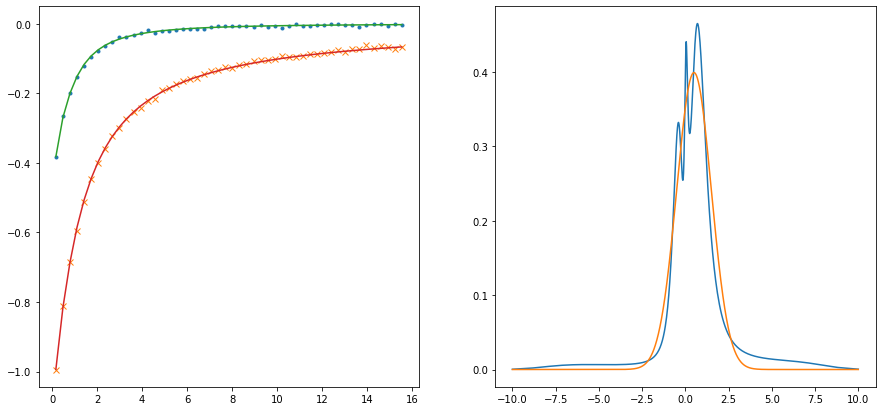

In [3]:
nw = 301
w = 10. * np.tan(np.linspace(-np.pi/2.1, np.pi/2.1, num=nw, endpoint=True)) / np.tan(np.pi/2.1)
# w = np.linspace(-10., 10., num=nw, endpoint=True)
# model = np.ones_like(w)
model = np.exp(-(w/8.)**6)
model /= np.trapz(model, w)
probl = cont.AnalyticContinuationProblem(im_axis=wn, re_axis=w, im_data=giw, kernel_mode='freq_fermionic')
sol,_ = probl.solve(method='maxent_svd', stdev=np.ones_like(wn)*noise_ampl, 
                    alpha_determination='chi2kink', optimizer='newton', model=model)
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
ax[0].plot(wn, giw.real, marker='.', linestyle='None')
ax[0].plot(wn, giw.imag, marker='x', linestyle='None')
ax[0].plot(wn, sol.backtransform.real)
ax[0].plot(wn, sol.backtransform.imag)
ax[1].plot(w, sol.A_opt)
ax[1].plot(wgrid_full, spectrum_true)
plt.show()

301 data points on real axis
100 data points on imaginary axis
32 significant singular values
Precomputation of coefficient matrices...
log10(alpha) = 9.00,	chi2 = 8.393e+04,   S = -1.616e-09,   nfev = 5,   norm = 1.000
log10(alpha) = 8.00,	chi2 = 8.387e+04,   S = -1.616e-07,   nfev = 11,   norm = 1.000
log10(alpha) = 7.00,	chi2 = 8.329e+04,   S = -1.616e-05,   nfev = 14,   norm = 1.003
log10(alpha) = 6.00,	chi2 = 7.750e+04,   S = -1.606e-03,   nfev = 18,   norm = 1.033
log10(alpha) = 5.00,	chi2 = 3.488e+04,   S = -1.061e-01,   nfev = 21,   norm = 1.256
log10(alpha) = 4.00,	chi2 = 2.658e+03,   S = -5.150e-01,   nfev = 35,   norm = 1.365
log10(alpha) = 3.00,	chi2 = 3.171e+02,   S = -8.097e-01,   nfev = 22,   norm = 1.168
log10(alpha) = 2.00,	chi2 = 5.553e+01,   S = -1.132e+00,   nfev = 22,   norm = 1.047
log10(alpha) = 1.00,	chi2 = 4.054e+01,   S = -1.305e+00,   nfev = 21,   norm = 1.011
log10(alpha) = 0.00,	chi2 = 3.894e+01,   S = -1.562e+00,   nfev = 37,   norm = 1.007
log10(alpha) = 

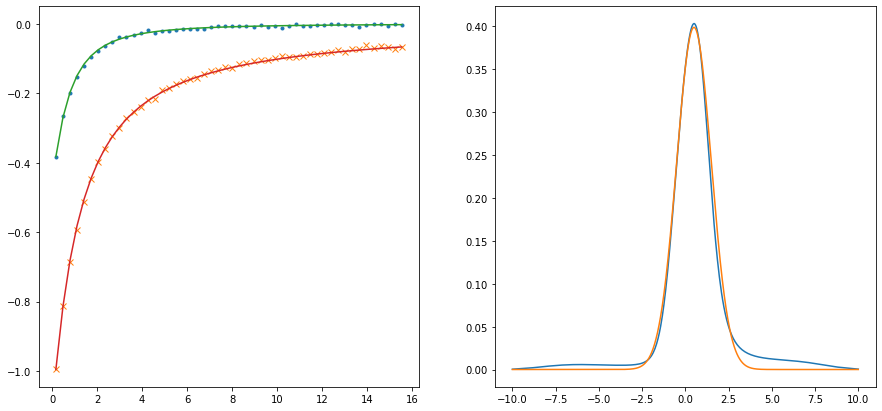

In [4]:
probl = cont.AnalyticContinuationProblem(im_axis=wn, re_axis=w, im_data=giw, kernel_mode='freq_fermionic')
sol,_ = probl.solve(method='maxent_svd', 
                    stdev=np.ones_like(wn)*noise_ampl*1., 
                    alpha_determination='chi2kink',
                    optimizer='newton',
                    model=model,
                    preblur=True,
                    blur_width=0.45)
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
ax[0].plot(wn, giw.real, marker='.', linestyle='None')
ax[0].plot(wn, giw.imag, marker='x', linestyle='None')
ax[0].plot(wn, sol.backtransform.real)
ax[0].plot(wn, sol.backtransform.imag)
ax[1].plot(w, sol.A_opt)
ax[1].plot(wgrid_full, spectrum_true)
plt.show()